In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import sys
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [8]:
d = '/content/drive/My Drive/IRIS'

In [9]:
df = pd.read_csv('/content/drive/MyDrive/iris/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.shape

(150, 5)

In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [14]:
df.isnull().sum()  #checking null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df['species'].value_counts()   #checking columns count of "Species"

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

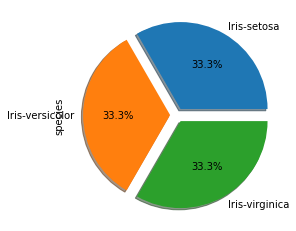

In [20]:
#Pie plot to show the overall types of Iris classifications

df['species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow= True, explode = [0.08,0.08,0.08])

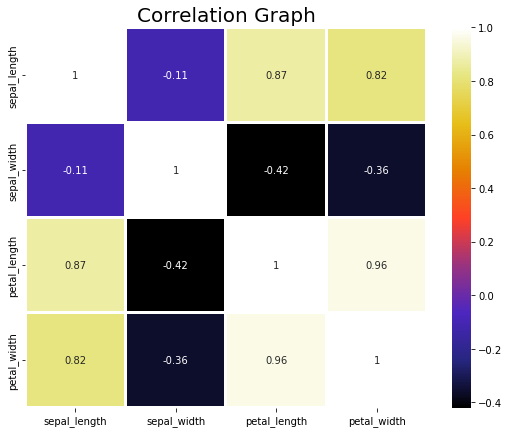

In [22]:
#Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

#Defining independent and dependent variables

In [25]:
features = ['sepal_length','sepal_width','petal_length','petal_width']
X = df.loc[:, features].values   #defining the feature matrix
y = df.species

#Splitting the dataset into training and test sets


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set

In [27]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#Visualizing the decision tree

[Text(0.4, 0.9, 'petal width(cm) <= 0.75\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'petal length(cm) <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'petal width(cm) <= 1.65\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'sepal width(cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'petal length(cm) <= 5.05\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'petal width(cm) <= 1.8\ngini = 0.444\nsamples = 

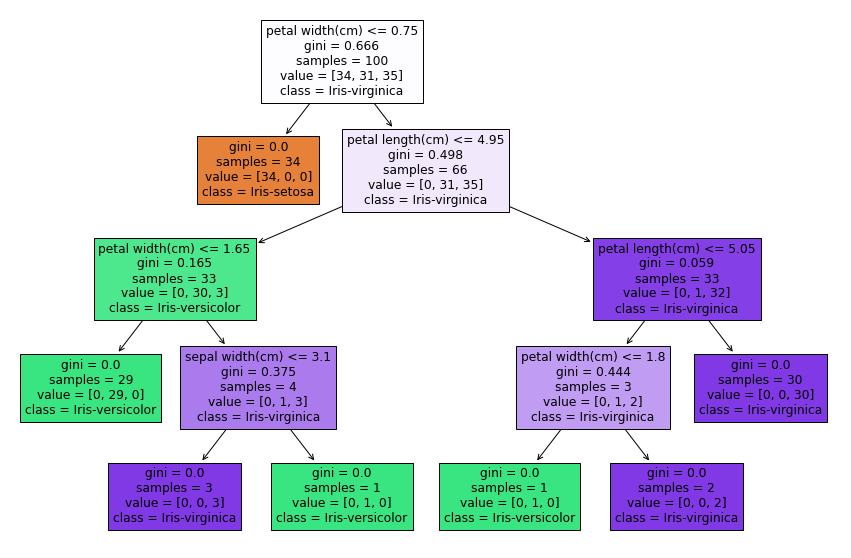

In [30]:
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= df.species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

#Prediction on test data

In [31]:
y_pred = dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

#Checking the accuracy of the model

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]])

#Predicting the output class for random values for petal and sepal length and width


Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively


In [35]:
 dtree.predict([[5, 3.6, 1.4 , 0.2]])

array(['Iris-setosa'], dtype=object)

Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 3.1cm, 5cm and 1.5cm respectively

In [36]:
dtree.predict([[9, 3.1, 5, 1.5]])

array(['Iris-versicolor'], dtype=object)

Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 4.1cm, 3cm, 5.1cm and 1.8cm respectively

In [37]:
dtree.predict([[4.1, 3.0, 5.1, 1.8]])

array(['Iris-virginica'], dtype=object)